# Más métodos Monte Carlo
Se le llama método Monte Carlo a todo aquel algoritmo computacional que usa números aleatorios como herramienta principal para resolver problemas. Hoy vamos a resolver el siguiente problema usando números aleatorios.


## Problema del cumpleaños

> Si tenemos un grupo de 23 personas. ¿Cuál es la probabilidad de que al menos dos personas del grupo cumplan años el mismo día?

Para resolver este problema usaremos el poder de la computadora. Esto se logrará de la siguiente manera: 

1. Generaremos una lista aleatoria con 23 fechas de cumpleaños

2. Escribiremos un código capaz de decirnos si se repite alguna fecha

3. Crearemos una función que repita este proceso un número arbitrario de veces y nos diga cuántas veces se repitió al menos un cumpleaños

4. Ahora ya podemos calcular la probabilidad ¿Cómo le hacemos?

# 1

In [1]:
rand([i for i in 1:23])

3

In [2]:
dias_del_año = [i for i in 1:365]
rand(dias_del_año,23)

23-element Array{Int64,1}:
 359
 164
 220
 114
 279
 173
 318
  49
 343
 231
  29
 303
 158
 224
  85
 268
  47
 253
 300
  38
 234
 191
 337

In [3]:
alumnos = rand(dias_del_año,23)

23-element Array{Int64,1}:
 362
 218
  42
 287
 184
 355
  84
 265
 348
 117
 218
 216
 129
 139
 311
  81
 176
  68
  17
  32
   6
 271
 282

# 2



In [ ]:

if <si se repite>
    return true
else
    return false
end

In [4]:
alumnos[10]

117

In [5]:
for i in 1:length(alumnos)
    println(alumnos[i] in alumnos[i+1:end])
end

false
true
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false


In [30]:
function si_se_repite(grupo)
    flag = false
    @show(grupo)
    for i in 1:length(grupo)
        
        if grupo[i] in grupo[i+1:end]
            flag = true
            @show(grupo[i])         #### Solamente para ver que las cosas sirvan
            break
        end
    end
    
    return flag
end

si_se_repite (generic function with 1 method)

Probamos si nuestra función hace lo que queremos

In [24]:
dias_del_año = [i for i in 1:365]
grupo = rand(dias_del_año,23)

### Imprimimos para ver si se repite o no
println(grupo)

si_se_repite(grupo)



[361, 335, 245, 154, 52, 42, 97, 303, 312, 137, 247, 87, 96, 137, 231, 194, 281, 265, 282, 297, 67, 173, 63]
grupo[i] = 137


true

Para saber si se repite debemos hacerlo a ojo; inspeccionando cada lista

In [20]:
dias_del_año = [i for i in 1:365]
grupo = rand(dias_del_año,23)

### Imprimimos para ver si se repite o no
println(grupo)

si_se_repite(grupo)

[5, 276, 243, 292, 45, 120, 251, 149, 305, 310, 114, 118, 53, 48, 16, 121, 340, 155, 238, 196, 188, 285, 25]


false

# 3

In [31]:
### esta funcion contará el número de repeticiones 
### dado el número de listas (num_listas)

function num_eventos(num_listas)
    num_repeticiones = 0
    dias_del_año = [i for i in 1:365]
    
    for i in 1:num_listas
        grupo = rand(dias_del_año,23)
        
        #println(grupo)
        
        if si_se_repite(grupo)
            num_repeticiones += 1       
        end
        
    end
    return num_repeticiones
end

num_eventos (generic function with 1 method)

Probamos que nuestra función tenga sentido para pocas listas

In [29]:
num_eventos(2)

grupo = [43, 235, 90, 267, 336, 337, 74, 298, 341, 137, 210, 165, 93, 67, 64, 151, 117, 68, 181, 46, 42, 141, 216]
grupo = [148, 201, 347, 76, 201, 315, 212, 60, 41, 141, 46, 312, 140, 127, 105, 256, 241, 132, 26, 208, 6, 173, 35]
grupo[i] = 201


1

## Apartir de aqui comentamos la línea de @show en la definición de `num_eventos()`

In [32]:
function si_se_repite(grupo)
    flag = false
    #@show(grupo)
    for i in 1:length(grupo)
        
        if grupo[i] in grupo[i+1:end]
            flag = true
            #@show(grupo[i])         #### Solamente para ver que las cosas sirvan
            break
        end
    end
    
    return flag
end

si_se_repite (generic function with 1 method)

calculamos la probabilidad de ocurrencia

In [33]:
num_listas = 30000000
num_eventos(num_listas)/num_listas

0.5073943666666667

# Respuesta: $\sim \frac{1}{2}$

## Caminantes aleatorios

Una caminata aleatoria es un objeto matemático que describe la trayectoria de una partícula que cambia de dirección de manera aletoria a cada paso. El ejemplo más sencillo es el movimiento en una dimensión con una longitud de paso constante; pensemos que se mueve en la línea recta y se mueve una unidad a la derecha o a la izquierda (+1 o -1) en cada paso. Otro ejemplo incluye el camino trazado por una partícula muy pequeña inmersa en un líquido o gas (**Movimiento Browniano**), el camino de búsqueda de forraje por un animal, la fluctuación del valor de las acctions y el estado financiero de un apostador se pueden modelar usando caminantes aleatorios; incluso si realmente no son completamente aleatorios. 

Aplicación en muchas ramas de la ciencia: ecología, psicología, ciencias de la computación, física, química, biología y economía.

### Modelando
Para modelar un sistema físico debemos hacer ciertos simplificaciones, 

* Modelaremos la interacción del fluido con la partícula mediante impactos aleatorios sobre la partícula,
* Suponemos que, debido a los impactos, la partícula se mueve en brincos,
* Los impactos se dan en tiempos regulares, la distancia temporal entre impactos consecutivos es constante,
* Supondremos que los brincos son de distancia constante y se mueve en una cuadrícula.

### Caminata aleatoria en 1D

La posición de la partícula se representa con $\{x | x \in \mathbb{Z}\}$; se mueve sobre la recta numérica. Por simplicidad vamos a suponer que en $t=0$ la partícula está en el origen $x=0$.

**¿Cómo generamos pasos aleatorios a la derecha o a la izquierda con igual probabilidad?**



In [14]:
x = 0
pasos = 100
    for i in 1:pasos
        δ = rand([-1,1])
        x += δ
    println(x)
end
x

1
0
-1
0
-1
-2
-1
-2
-1
0
1
0
-1
-2
-3
-4
-3
-4
-3
-2
-1
0
1
0
-1
-2
-1
-2
-1
0
-1
0
-1
-2
-3
-2
-1
-2
-3
-2
-1
0
1
2
1
0
1
0
1
0
-1
-2
-1
-2
-3
-4
-3
-2
-3
-2
-1
0
1
0
-1
0
1
2
1
2
1
2
1
2
1
0
-1
0
1
0
1
0
1
2
3
4
5
4
3
4
5
6
5
4
5
6
7
6
5
6


6

Ahora podremos hacer nuestra primera caminata. 

**Vamos a escribir una función que tome un argumento, t, y mueva la partícula t pasos consecutivos**

1. Cree una función llamada `caminando(t)` que imprima a pantalla las posiciones del caminante.

In [22]:
function caminando(t)
 x = 0
      for i in 1:t    
        δ = rand([-1,1])
        x += δ
        println(x)
    end
end

caminando (generic function with 1 method)

In [24]:
caminando(100)

-1
-2
-1
-2
-3
-2
-3
-4
-5
-4
-5
-4
-3
-4
-5
-6
-5
-4
-3
-4
-3
-2
-1
0
1
0
-1
0
-1
0
-1
-2
-3
-2
-1
0
-1
-2
-3
-2
-1
-2
-1
-2
-3
-4
-5
-4
-3
-4
-3
-4
-3
-4
-5
-4
-5
-6
-5
-4
-3
-4
-3
-2
-3
-2
-3
-2
-1
0
1
2
1
0
-1
0
1
2
1
2
1
2
3
2
1
0
1
2
3
2
1
0
-1
-2
-1
-2
-3
-2
-3
-4


2. Modifique la función para que guarde las posiciones en un vector y lo regrese como resultado.

In [44]:
function caminando(t,x_inicial=0)
    x = x_inicial
    posiciones = Int64[]
      for i in 1:t    
        push!(posiciones,x)
        δ = rand([-1,1])
        
        x += δ
        
    end
    return posiciones
end

caminando (generic function with 2 methods)

In [30]:
xes=caminando(100)

100-element Array{Int64,1}:
  1
  0
 -1
 -2
 -3
 -4
 -3
 -4
 -5
 -4
 -3
 -2
 -1
  ⋮
  5
  4
  3
  2
  1
  2
  1
  2
  3
  4
  5
  4

In [32]:
using Plots
gr()

Plots.GRBackend()

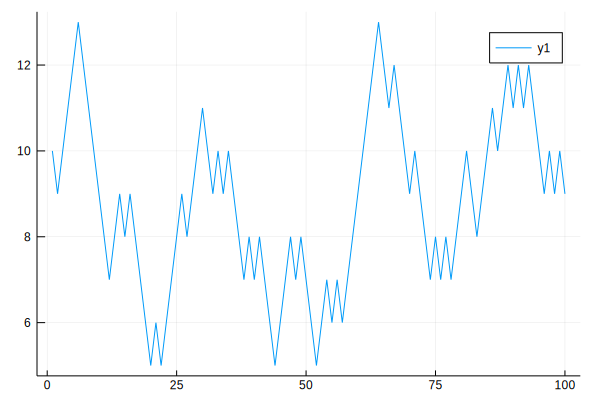

In [46]:
num_pasos=100
tiempos = [i for i in 1:num_pasos]
posiciones = caminando(num_pasos,10)
plot(tiempos,posiciones)

### Visualización

Ahora vamos a hacer dibujos.

1. Crea una arreglo llamado  `caminante` con 20 pasos.

In [47]:
num_pasos = 20
tiempos = [i for i in 1:num_pasos]
posiciones = caminando(num_pasos)

20-element Array{Int64,1}:
  0
  1
  0
 -1
  0
  1
  2
  1
  0
 -1
 -2
 -1
 -2
 -3
 -4
 -5
 -4
 -3
 -4
 -3

2. Usa `plot()` o `scatter()` para dibujar la trayectoria del caminante

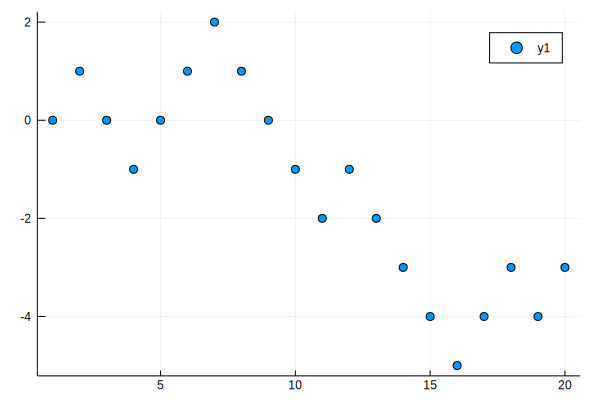

In [48]:
scatter(tiempos,posiciones)

### Nube de Caminantes

1. Usa un `for` para crear 100 caminantes con 100 pasos y dibújalos en la misma gráfica. 

*Tip: Guarda una gráfica vacía sin leyenda (`leg=false`) en una variable, `p`, y agrega las gráficas usando `plot!()`. Al final debes mostrar la gráfica con el comando `display(p)`*

In [61]:
num_pasos = 100
tiempos = [i for i in 1:num_pasos]
num_caminantes = 20
posiciones = caminando(num_pasos)
p = plot(tiempos,posiciones)
for i in 1:num_caminantes
    posiciones = caminando(num_pasos)
    plot!(tiempos,posiciones,leg=false)
end


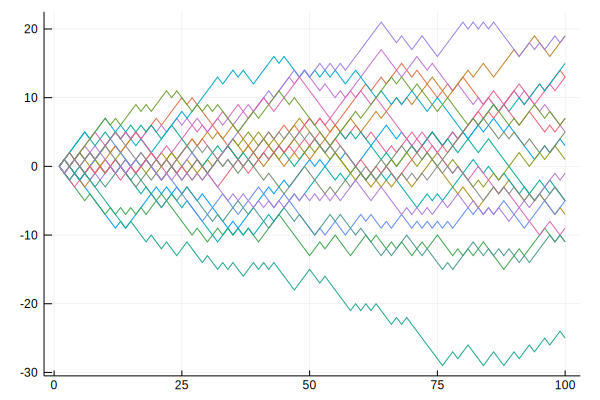

In [62]:
display(p)

2. ¿Qué observas? ¿Cómo crece la nube en función de los pasos? 

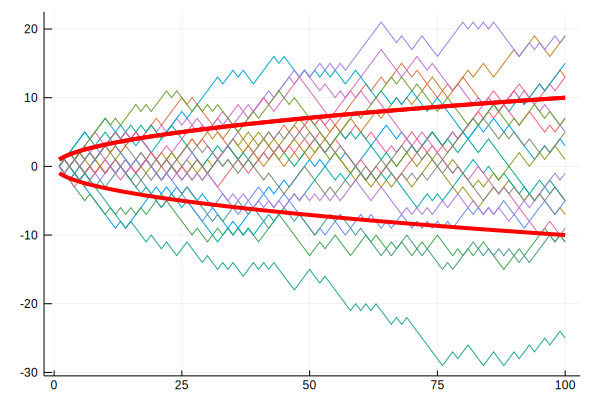

In [64]:
plot!(tiempos,tiempos.^(1/2),c=:red,lw=4)
plot!(tiempos,-tiempos.^(1/2),c=:red,lw=4)

3. ¿Cuántos caminantes coninciden en el mismo punto al mismo tiempo?

### Guardar los datos

1 Guarda los datos que se generaron con
```julia
using DelimitedFiles  # paquete para escribir y leer datos
writedlm("archivo.dat", v)
```
donde el primer argumento es el nombre del archivo que se escribirá, y `v` es la variable a guardar.

In [ ]:
using DelimitedFiles


In [ ]:
v=rand(20)
b= rand(20)
writedlm("prueba2.dat",[v b])

In [ ]:
;ls

In [ ]:
;cat prueba.dat

In [ ]:
m = readdlm("prueba.dat")

In [ ]:
?writedlm

In [ ]:
open("prueba.dat","w") do io
    writedlm(io,[b v])
end